# Modèles TensorFlow - Classification et Régression

Ce notebook implémente deux modèles avec TensorFlow/Keras :
- **Classification** : Prédire si un étudiant va compléter le cours (`Completed`).
- **Régression** : Prédire les scores et la satisfaction (`Quiz_Score_Avg`, `Project_Grade`, `Satisfaction_Rating`, `Time_Spent_Hours`).

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## 1. Chargement des données

In [34]:
# Chargement des fichiers exportés
X_class = pd.read_csv('../data/processed/X_classification.csv')
y_class = pd.read_csv('../data/processed/y_classification.csv')

X_reg = pd.read_csv('../data/processed/X_regression.csv')
y_reg = pd.read_csv('../data/processed/y_regression.csv')

print("Datasets chargés successfully.")
print(f"Classification : X={X_class.shape}, y={y_class.shape}")
print(f"Régression : X={X_reg.shape}, y={y_reg.shape}")

Datasets chargés successfully.
Classification : X=(56172, 42), y=(56172, 1)
Régression : X=(56172, 37), y=(56172, 4)


## 2. PARTIE 1 : CLASSIFICATION
---

Objectif : Prédire la colonne `Completed` (0 ou 1).

In [35]:
# Split des données
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class.values, y_class.values.ravel(), test_size=0.2, random_state=42
)

In [ ]:
# Création du modèle de classification
model_class = Sequential([
    Input(shape=(X_train_c.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_class.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_class.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Entraînement
history_class = model_class.fit(
    X_train_c, y_train_c, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ],
    verbose=1
)

Epoch 1/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5647 - loss: 0.6806 - val_accuracy: 0.6000 - val_loss: 0.6679
Epoch 2/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5941 - loss: 0.6680 - val_accuracy: 0.5977 - val_loss: 0.6654
Epoch 3/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5949 - loss: 0.6668 - val_accuracy: 0.5970 - val_loss: 0.6642
Epoch 4/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6003 - loss: 0.6654 - val_accuracy: 0.5969 - val_loss: 0.6651
Epoch 5/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6020 - loss: 0.6638 - val_accuracy: 0.5984 - val_loss: 0.6665
Epoch 6/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6001 - loss: 0.6640 - val_accuracy: 0.6009 - val_loss: 0.6640
Epoch 7/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6037 - loss: 0.6626 - val_accuracy: 0.5976 - val_loss: 0.6640
Epoch 8/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6031 - loss: 0.6627 - 

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.6085 - loss: 0.6567

Accuracy sur le Test Set : 0.6085


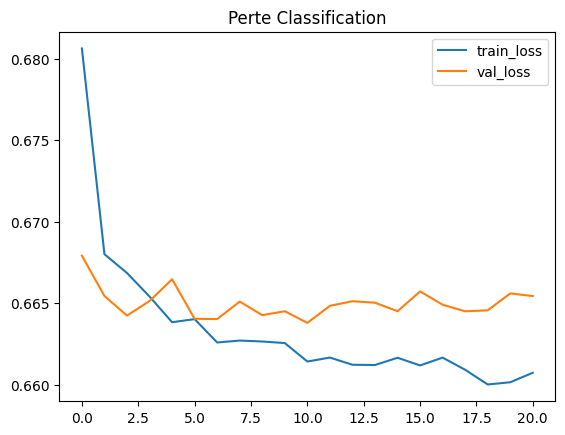

In [38]:
# Évaluation Classification
loss_c, acc_c = model_class.evaluate(X_test_c, y_test_c)
print(f"\nAccuracy sur le Test Set : {acc_c:.4f}")

# Plot
plt.plot(history_class.history['loss'], label='train_loss')
plt.plot(history_class.history['val_loss'], label='val_loss')
plt.title('Perte Classification')
plt.legend()
plt.show()

## 3. PARTIE 2 : RÉGRESSION
---

Objectif : Prédire les 4 variables continues simultanément.

In [39]:
# Split des données
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg.values, y_reg.values, test_size=0.2, random_state=42
)

In [ ]:
# Création du modèle de régression
model_reg = Sequential([
    Input(X_train_r.shape[1]),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(4) # 4 neuronnes de sorties (sans activation pour la régression)
])

model_reg.compile(optimizer='adam', loss='mse')
model_reg.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,108 (19.95 KB)

 Trainable params: 5,108 (19.95 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Entraînement
history_reg = model_reg.fit(
    X_train_r, y_train_r, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ],
    verbose=1
)

Epoch 1/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 411.2757 - val_loss: 116.0354
Epoch 2/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 211.8610 - val_loss: 109.4412
Epoch 3/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 197.5567 - val_loss: 99.0928
Epoch 4/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 188.9519 - val_loss: 96.7012
Epoch 5/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - loss: 183.3185 - val_loss: 106.1980
Epoch 6/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 177.2128 - val_loss: 97.1641
Epoch 7/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 171.5069 - val_loss: 91.8314
Epoch 8/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 164.3929 - val_loss: 94.1536
Epoch 9/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 160.7642 - val_loss: 89.1723
Epoch 10/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 153.1870 - val_loss: 82.0304
Epoch 11/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 145.5942 - val_loss: 

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
Quiz_Score_Avg -> RMSE: 154.3697, R2: 0.0430
Project_Grade -> RMSE: 46.0735, R2: 0.9615
Satisfaction_Rating -> RMSE: 0.4942, R2: 0.0010
Time_Spent_Hours -> RMSE: 14.1958, R2: 0.0041


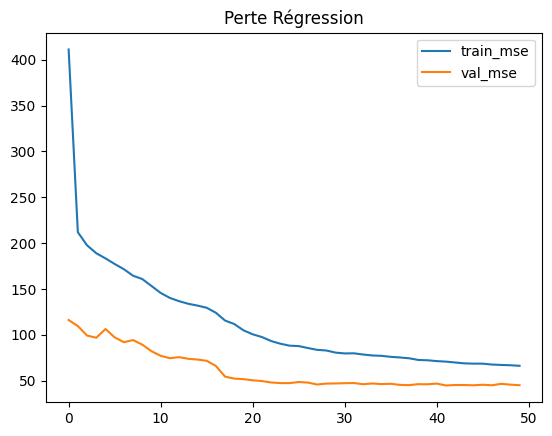

In [ ]:
# Évaluation Régression
y_pred_r = model_reg.predict(X_test_r)
y_pred_orig = scaler_yr.inverse_transform(y_pred_r)
y_test_orig = scaler_yr.inverse_transform(y_test_r)

target_names = ['Quiz_Score_Avg', 'Project_Grade', 'Satisfaction_Rating', 'Time_Spent_Hours']
for i, name in enumerate(target_names):
    rmse = np.sqrt(mean_squared_error(y_test_orig[:, i], y_pred_orig[:, i]))
    r2 = r2_score(y_test_orig[:, i], y_pred_orig[:, i])
    print(f"{name} -> RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Plot Loss Régression
plt.plot(history_reg.history['loss'], label='train_mse')
plt.plot(history_reg.history['val_loss'], label='val_mse')
plt.title('Loss Régression')
plt.legend()
plt.show()